Now we will move to the Exploratory Data Analysis, the file we are going to use is the csv file "ZillowCompleteSingleFam.csv" created on Jupyter Notebook "Zillow Data"

In [1]:
#Importing modules needed 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import seaborn as sn

In [2]:
# Importing data

ZillowData = pd.read_csv('../Capstone_2/ZillowCompleteSingleFam.csv')
ZillowData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518791 entries, 0 to 518790
Data columns (total 31 columns):
 #   Column                                                  Non-Null Count   Dtype  
---  ------                                                  --------------   -----  
 0   Unnamed: 0                                              518791 non-null  int64  
 1   Date                                                    518791 non-null  object 
 2   RegionName                                              518791 non-null  int64  
 3   DaysOnZillow_AllHomes                                   518791 non-null  float64
 4   InventoryRaw_AllHomes                                   518791 non-null  float64
 5   MedianListingPricePerSqft_1Bedroom                      518791 non-null  float64
 6   MedianListingPricePerSqft_2Bedroom                      518791 non-null  float64
 7   MedianListingPricePerSqft_3Bedroom                      518791 non-null  float64
 8   MedianListingPricePerSqf

In [3]:
ZillowData.head(100)

,Unnamed: 0,Date,RegionName,DaysOnZillow_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,...,PctOfHomesIncreasingInValues_AllHomes,PctOfHomesSellingForGain_AllHomes,PctOfHomesSellingForLoss_AllHomes,PctOfListingsWithPriceReductions_AllHomes,PctOfListingsWithPriceReductions_SingleFamilyResidence,PriceToRentRatio_AllHomes,Sale_Counts,Year,CountyName,StateName
0,0,1996-04-30,10001,110.125,319.0,187.849166,114.035088,100.641026,112.187731,125.451825,...,58.67,92.27,7.73,11.253197,11.386139,9.91,151.0,1996,Kent,Delaware
1,1,1996-04-30,10003,110.125,319.0,187.849166,114.035088,100.641026,112.187731,125.451825,...,58.67,92.27,7.73,11.253197,11.386139,9.91,151.0,1996,New Castle,Delaware
2,2,1996-04-30,1003,110.125,319.0,187.849166,114.035088,100.641026,112.187731,125.451825,...,58.67,92.27,7.73,11.253197,11.386139,9.91,151.0,1996,Baldwin,Alabama
3,3,1996-04-30,1009,110.125,319.0,187.849166,114.035088,100.641026,112.187731,125.451825,...,58.67,92.27,7.73,11.253197,11.386139,9.91,151.0,1996,Blount,Alabama
4,4,1996-04-30,1017,110.125,319.0,187.849166,114.035088,100.641026,112.187731,125.451825,...,58.67,92.27,7.73,11.253197,11.386139,9.91,151.0,1996,Chambers,Alabama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,1996-04-30,13123,110.125,319.0,187.849166,114.035088,100.641026,112.187731,125.451825,...,58.67,92.27,7.73,11.253197,11.386139,9.91,151.0,1996,Gilmer,Georgia
96,96,1996-04-30,13127,110.125,319.0,187.849166,114.035088,100.641026,112.187731,125.451825,...,58.67,92.27,7.73,11.253197,11.386139,9.91,151.0,1996,Glynn,Georgia
97,97,1996-04-30,13129,110.125,319.0,187.849166,114.035088,100.641026,112.187731,125.451825,...,58.67,92.27,7.73,11.253197,11.386139,9.91,151.0,1996,Gordon,Georgia
98,98,1996-04-30,13135,110.125,319.0,187.849166,114.035088,100.641026,112.187731,125.451825,...,58.67,92.27,7.73,11.253197,11.386139,9.91,151.0,1996,Gwinnett,Georgia


We are going to review some key factors to see if we find anything interesting

In [4]:
ZillowData.drop('Unnamed: 0', axis=1, inplace=True)

To compare some state wide values to AZ, we will create a variable for AZ data only

In [5]:
AzZillowData = ZillowData[(ZillowData.StateName == "Arizona")]


Let's check days on Zillow for all States and compare to AZ, and we will graph it an easier visualization of the data

In [6]:
AllStates_DoZ = ZillowData[['Year','DaysOnZillow_AllHomes']].groupby(['Year'])['DaysOnZillow_AllHomes'].mean()
AZ_DoZ = AzZillowData[['Year','DaysOnZillow_AllHomes']].groupby(['Year'])['DaysOnZillow_AllHomes'].mean()

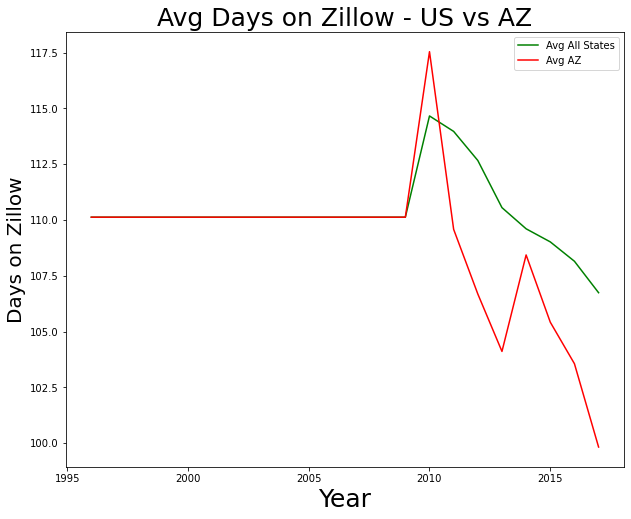

In [7]:
plt.figure(figsize=(10, 8))
plt.plot(AllStates_DoZ, color='g', label='Avg All States')
plt.plot(AZ_DoZ, color='r', label='Avg AZ')
plt.xlabel('Year',fontsize = 25)
plt.ylabel('Days on Zillow',fontsize = 20)
plt.title('Avg Days on Zillow - US vs AZ',fontsize = 25)
plt.legend()
plt.show()

In [8]:
Most_DoZ = ZillowData[['StateName','DaysOnZillow_AllHomes']].groupby(['StateName'])['DaysOnZillow_AllHomes'].mean().to_frame('Avg Days on Zillow')
Most_DoZ.sort_values(by=['Avg Days on Zillow'], ascending=False).reset_index()

,StateName,Avg Days on Zillow
0,New Jersey,123.542541
1,Connecticut,118.238186
2,New York,116.439497
3,Rhode Island,114.223978
4,Delaware,113.978290
5,Maryland,113.128879
6,South Carolina,112.679015
7,Florida,112.415121
8,Massachusetts,111.770845
9,Pennsylvania,111.748806


Overall AZ has a lower days on market than the nation average, and when we compare state by state, its ranked 44th - just above Oregon, Washington, Nevada, Utah, Colardo, California, and District of Columbia

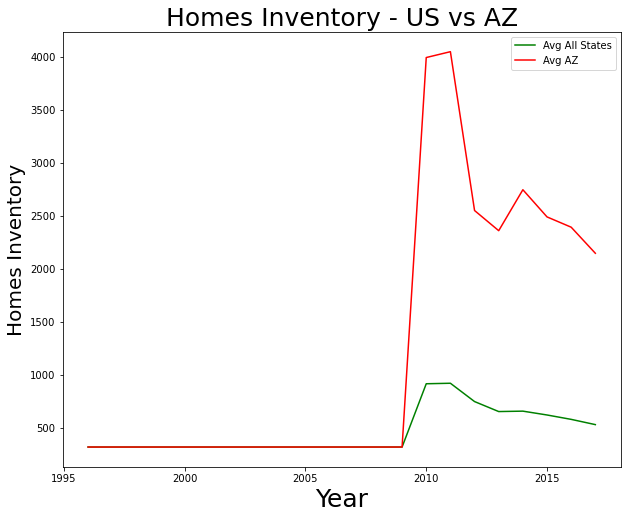

In [9]:
#Inventory all homes on market 

AllStates_Invt = ZillowData[['Year','InventoryRaw_AllHomes']].groupby(['Year'])['InventoryRaw_AllHomes'].mean()
AZ_Invt = AzZillowData[['Year','InventoryRaw_AllHomes']].groupby(['Year'])['InventoryRaw_AllHomes'].mean()

plt.figure(figsize=(10, 8))
plt.plot(AllStates_Invt, color='g', label='Avg All States')
plt.plot(AZ_Invt, color='r', label='Avg AZ')
plt.xlabel('Year',fontsize = 25)
plt.ylabel('Homes Inventory',fontsize = 20)
plt.title('Homes Inventory - US vs AZ',fontsize = 25)
plt.legend()
plt.show()

AZ seems to have 4x more Home inventory than the nation average between the period of 2008 - 2012. Remember that this is when the house market crash and AZ was one of the states in which home values decresed as much as 50%!

In [10]:
Most_HomeInvt = ZillowData[['StateName','InventoryRaw_AllHomes']].groupby(['StateName'])['InventoryRaw_AllHomes'].mean().to_frame('Home Inventory')
Most_HomeInvt.sort_values(by=['Home Inventory'], ascending=False).head(5)

,Home Inventory
StateName,
Connecticut,1338.113027
Delaware,1299.527508
Florida,1270.980431
Arizona,1261.287858
New Jersey,1246.234446


It seems that AZ has been a hot market for the past few years. Its where houses spend less time on the market and there seems to be a lot of inventory to choose from. 

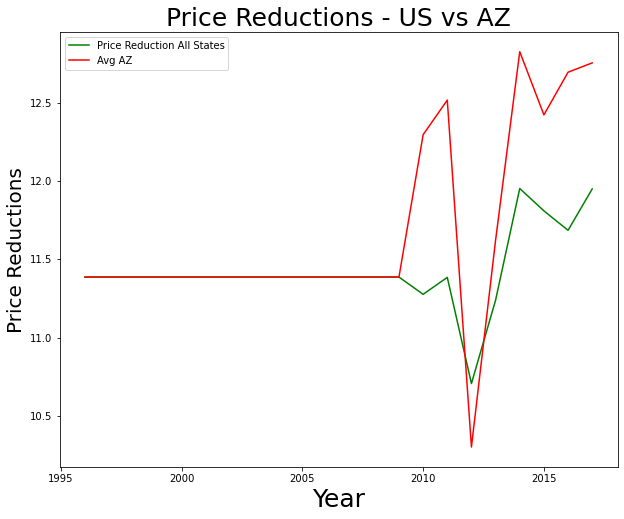

In [11]:
# Price decrease 

AllStates_PriceReduction = ZillowData[['Year','PctOfListingsWithPriceReductions_SingleFamilyResidence']].groupby(['Year'])['PctOfListingsWithPriceReductions_SingleFamilyResidence'].mean()
AZ_PriceReduction = AzZillowData[['Year','PctOfListingsWithPriceReductions_SingleFamilyResidence']].groupby(['Year'])['PctOfListingsWithPriceReductions_SingleFamilyResidence'].mean()

plt.figure(figsize=(10, 8))
plt.plot(AllStates_PriceReduction, color='g', label='Price Reduction All States')
plt.plot(AZ_PriceReduction, color='r', label='Avg AZ')
plt.xlabel('Year',fontsize = 25)
plt.ylabel('Price Reductions',fontsize = 20)
plt.title('Price Reductions - US vs AZ',fontsize = 25)
plt.legend()
plt.show()

Interesting, when inventory was very high, we saw a hike on price reductions.

In [12]:
AllStates_PriceReduction = ZillowData[['StateName','PctOfListingsWithPriceReductions_SingleFamilyResidence']].groupby(['StateName'])['PctOfListingsWithPriceReductions_SingleFamilyResidence'].mean().to_frame('% Homes with Price Reduction')
AllStates_PriceReduction.sort_values(by=['% Homes with Price Reduction'], ascending=False).reset_index()

,StateName,% Homes with Price Reduction
0,Connecticut,12.762987
1,Delaware,12.426061
2,Rhode Island,12.319282
3,Maryland,12.302116
4,New Jersey,12.090695
5,Illinois,12.046501
6,Massachusetts,12.046465
7,Alaska,11.920258
8,Pennsylvania,11.908390
9,District of Columbia,11.887878


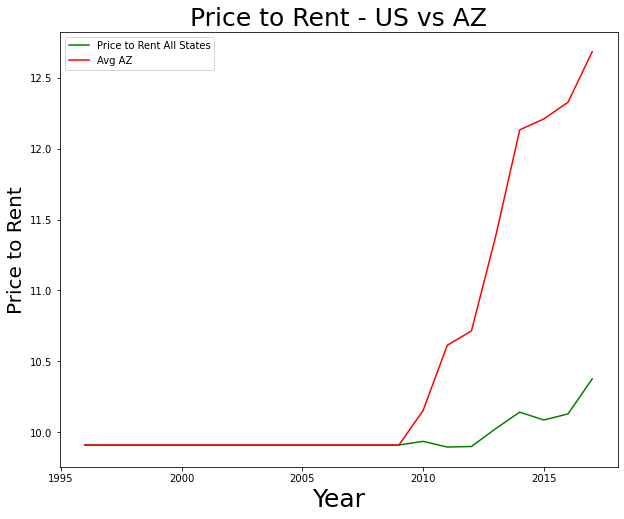

In [13]:
# Price to rent ratio 

AllStates_PriceToRent = ZillowData[['Year','PriceToRentRatio_AllHomes']].groupby(['Year'])['PriceToRentRatio_AllHomes'].mean()
AZ_PriceToRent = AzZillowData[['Year','PriceToRentRatio_AllHomes']].groupby(['Year'])['PriceToRentRatio_AllHomes'].mean()

plt.figure(figsize=(10, 8))
plt.plot(AllStates_PriceToRent, color='g', label='Price to Rent All States')
plt.plot(AZ_PriceToRent, color='r', label='Avg AZ')
plt.xlabel('Year',fontsize = 25)
plt.ylabel('Price to Rent',fontsize = 20)
plt.title('Price to Rent - US vs AZ',fontsize = 25)
plt.legend()
plt.show()

In [14]:
AllStates_PriceToRent = ZillowData[['StateName','PriceToRentRatio_AllHomes']].groupby(['StateName'])['PriceToRentRatio_AllHomes'].mean().to_frame('Price to Rent Ratio')
AllStates_PriceToRent.sort_values(by=['Price to Rent Ratio'], ascending=False).reset_index()

,StateName,Price to Rent Ratio
0,Hawaii,12.082193
1,District of Columbia,11.807468
2,California,11.429911
3,Massachusetts,11.178845
4,Washington,10.918175
5,Oregon,10.895603
6,Rhode Island,10.889617
7,Alaska,10.816157
8,Colorado,10.637560
9,Nevada,10.553608


It seems that the 2008 housing market has not stopped the price to rent ratio to increase, and AZ seems to be above the nation average, but its top 13 from the nation

Now we wil move forward and scale the data to be able to for our future analysis

In [15]:
# We only need numeric values for scaling, so we will concatenate and save non-numeric values into a new column
ZillowData['GeneralData']= ZillowData['CountyName']+ '-' + ZillowData['StateName'] + '-' + ZillowData['Date'] + '-' + ZillowData['RegionName'].astype(str)

In [16]:
# Now we set up the non-numeric values as indexes and will save a copy of index and columns names to create a new data frame
ZillowData_scale = ZillowData.set_index('GeneralData').drop(['CountyName', 'StateName', 'Date', 'RegionName', 'Year'], axis=1)
ZillowData_index = ZillowData_scale.index
ZillowData_columns = ZillowData_scale.columns

In [17]:
# scaling the data

ZillowData_scale = scale(ZillowData_scale)
ZillowData_scale

array([[-0.02263301, -0.16569608, -0.04089301, ..., -0.02745034,
        -0.0563282 , -0.10210694],
       [-0.02263301, -0.16569608, -0.04089301, ..., -0.02745034,
        -0.0563282 , -0.10210694],
       [-0.02263301, -0.16569608, -0.04089301, ..., -0.02745034,
        -0.0563282 , -0.10210694],
       ...,
       [-0.02263301,  0.91907949, -1.75071722, ..., -0.12085705,
         1.40008675, -0.10210694],
       [-0.02263301,  0.13931195, -0.04089301, ...,  0.54581675,
         0.55051136, -0.10210694],
       [-0.02263301, -0.01046878, -0.04089301, ...,  0.67721123,
         1.56696763, -0.10210694]])

In [18]:
# new data frame with scaled data

ZillowData_scale_df = pd.DataFrame(ZillowData_scale, columns=ZillowData_columns)

ZillowData_scale_df.head()

,DaysOnZillow_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,MedianListingPricePerSqft_AllHomes,MedianListingPricePerSqft_SingleFamilyResidence,MedianListingPrice_1Bedroom,...,MedianPctOfPriceReduction_AllHomes,MedianPctOfPriceReduction_SingleFamilyResidence,PctOfHomesDecreasingInValues_AllHomes,PctOfHomesIncreasingInValues_AllHomes,PctOfHomesSellingForGain_AllHomes,PctOfHomesSellingForLoss_AllHomes,PctOfListingsWithPriceReductions_AllHomes,PctOfListingsWithPriceReductions_SingleFamilyResidence,PriceToRentRatio_AllHomes,Sale_Counts
0,-0.022633,-0.165696,-0.040893,-0.068616,-0.100461,-0.072688,-0.053784,-0.129224,-0.130176,-0.03266,...,-0.09232,-0.093809,-0.115478,0.063483,0.013378,-0.013378,-0.026079,-0.02745,-0.056328,-0.102107
1,-0.022633,-0.165696,-0.040893,-0.068616,-0.100461,-0.072688,-0.053784,-0.129224,-0.130176,-0.03266,...,-0.09232,-0.093809,-0.115478,0.063483,0.013378,-0.013378,-0.026079,-0.02745,-0.056328,-0.102107
2,-0.022633,-0.165696,-0.040893,-0.068616,-0.100461,-0.072688,-0.053784,-0.129224,-0.130176,-0.03266,...,-0.09232,-0.093809,-0.115478,0.063483,0.013378,-0.013378,-0.026079,-0.02745,-0.056328,-0.102107
3,-0.022633,-0.165696,-0.040893,-0.068616,-0.100461,-0.072688,-0.053784,-0.129224,-0.130176,-0.03266,...,-0.09232,-0.093809,-0.115478,0.063483,0.013378,-0.013378,-0.026079,-0.02745,-0.056328,-0.102107
4,-0.022633,-0.165696,-0.040893,-0.068616,-0.100461,-0.072688,-0.053784,-0.129224,-0.130176,-0.03266,...,-0.09232,-0.093809,-0.115478,0.063483,0.013378,-0.013378,-0.026079,-0.02745,-0.056328,-0.102107


In [19]:
# for sanity check we will perform a few basic calculations to check scaling was done properly
# checking the mean
ZillowData_scale_df.mean()

DaysOnZillow_AllHomes                                     2.435043e-13
InventoryRaw_AllHomes                                    -4.818701e-14
MedianListingPricePerSqft_1Bedroom                        2.975434e-13
MedianListingPricePerSqft_2Bedroom                        1.286447e-13
MedianListingPricePerSqft_3Bedroom                        2.782364e-13
MedianListingPricePerSqft_4Bedroom                       -2.061546e-13
MedianListingPricePerSqft_5BedroomOrMore                 -1.575380e-13
MedianListingPricePerSqft_AllHomes                       -2.001658e-13
MedianListingPricePerSqft_SingleFamilyResidence          -3.293868e-13
MedianListingPrice_1Bedroom                              -2.063725e-13
MedianListingPrice_2Bedroom                               2.605737e-13
MedianListingPrice_3Bedroom                               4.663458e-13
MedianListingPrice_4Bedroom                              -2.673293e-13
MedianListingPrice_5BedroomOrMore                        -3.596436e-13
Median

In [20]:
# checking the std
ZillowData_scale_df.std(ddof=0)

DaysOnZillow_AllHomes                                     1.0
InventoryRaw_AllHomes                                     1.0
MedianListingPricePerSqft_1Bedroom                        1.0
MedianListingPricePerSqft_2Bedroom                        1.0
MedianListingPricePerSqft_3Bedroom                        1.0
MedianListingPricePerSqft_4Bedroom                        1.0
MedianListingPricePerSqft_5BedroomOrMore                  1.0
MedianListingPricePerSqft_AllHomes                        1.0
MedianListingPricePerSqft_SingleFamilyResidence           1.0
MedianListingPrice_1Bedroom                               1.0
MedianListingPrice_2Bedroom                               1.0
MedianListingPrice_3Bedroom                               1.0
MedianListingPrice_4Bedroom                               1.0
MedianListingPrice_5BedroomOrMore                         1.0
MedianListingPrice_AllHomes                               1.0
MedianPctOfPriceReduction_AllHomes                        1.0
MedianPc

It seems that all Scaling was done properly, now we will move forward and fit our data. 

In [21]:
# We Fit the PCA transformation using the scaled data.
zillow_pca = PCA().fit(ZillowData_scale)


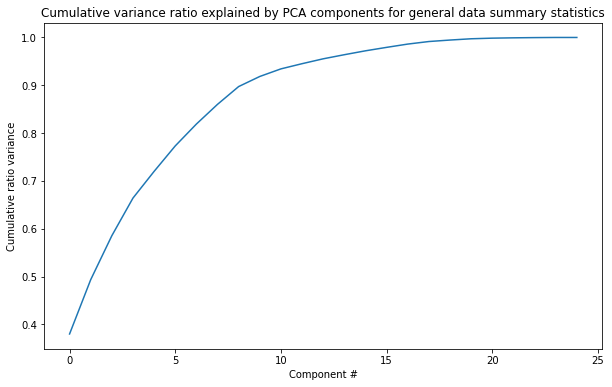

In [22]:
# Plot the cumulative variance ratio with number of components.

#Call the `cumsum()` method on the 'explained_variance_ratio_' attribute of `state_pca` and
#create a line plot to visualize the cumulative explained variance ratio with number of components
#Set the xlabel to 'Component #', the ylabel to 'Cumulative ratio variance', and the
#title to 'Cumulative variance ratio explained by PCA components for state/resort summary statistics'
#Hint: remember the handy ';' at the end of the last plot call to suppress that untidy output
plt.subplots(figsize=(10, 6))
plt.plot(zillow_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for general data summary statistics');

The first 5 components seem to account for over 70% of the variance, and the first 10 for over 90%.

In [23]:
# Apply the transformation to the data to obtain the derived features.

zillow_pca_x = zillow_pca.transform(ZillowData_scale)
zillow_pca_x

array([[-2.99886191e-01, -5.40723621e-02, -2.05210241e-01, ...,
         2.35523375e-03, -1.93706793e-04, -2.37724473e-17],
       [-2.99886191e-01, -5.40723621e-02, -2.05210241e-01, ...,
         2.35523375e-03, -1.93706793e-04, -2.37724473e-17],
       [-2.99886191e-01, -5.40723621e-02, -2.05210241e-01, ...,
         2.35523375e-03, -1.93706793e-04, -2.37724473e-17],
       ...,
       [ 1.10823172e+00, -8.86120378e-01, -3.98974450e-01, ...,
        -5.44489486e-02, -7.46115268e-02,  1.39217160e-16],
       [ 2.11959970e+00, -1.42102211e+00,  5.67046813e-03, ...,
        -1.43037541e-02, -4.24039876e-01,  4.16377638e-16],
       [ 1.07456888e+00, -1.23285366e+00, -6.34589014e-01, ...,
        -1.99982341e-01,  1.43383558e-02,  3.72885906e-16]])

In [24]:
zillow_pca_x.shape

(518791, 25)

In [25]:
x = zillow_pca_x[:, 0]
y = zillow_pca_x[:, 1]
gen_data = ZillowData_index


In [26]:
pc_var = 100 * zillow_pca.explained_variance_ratio_.cumsum()[1]


Text(0.5, 1.0, 'Gen Data summary PCA, 49.3% variance explained')

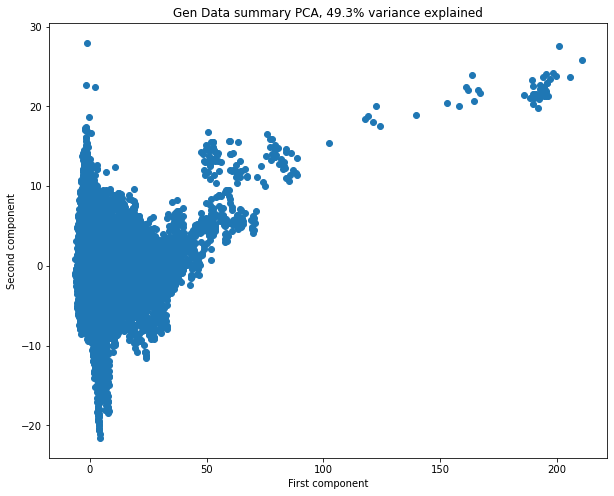

In [27]:
plt.subplots(figsize=(10,8))
plt.scatter(x=x, y=y)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f'Gen Data summary PCA, {pc_var:.1f}% variance explained')


<AxesSubplot:>

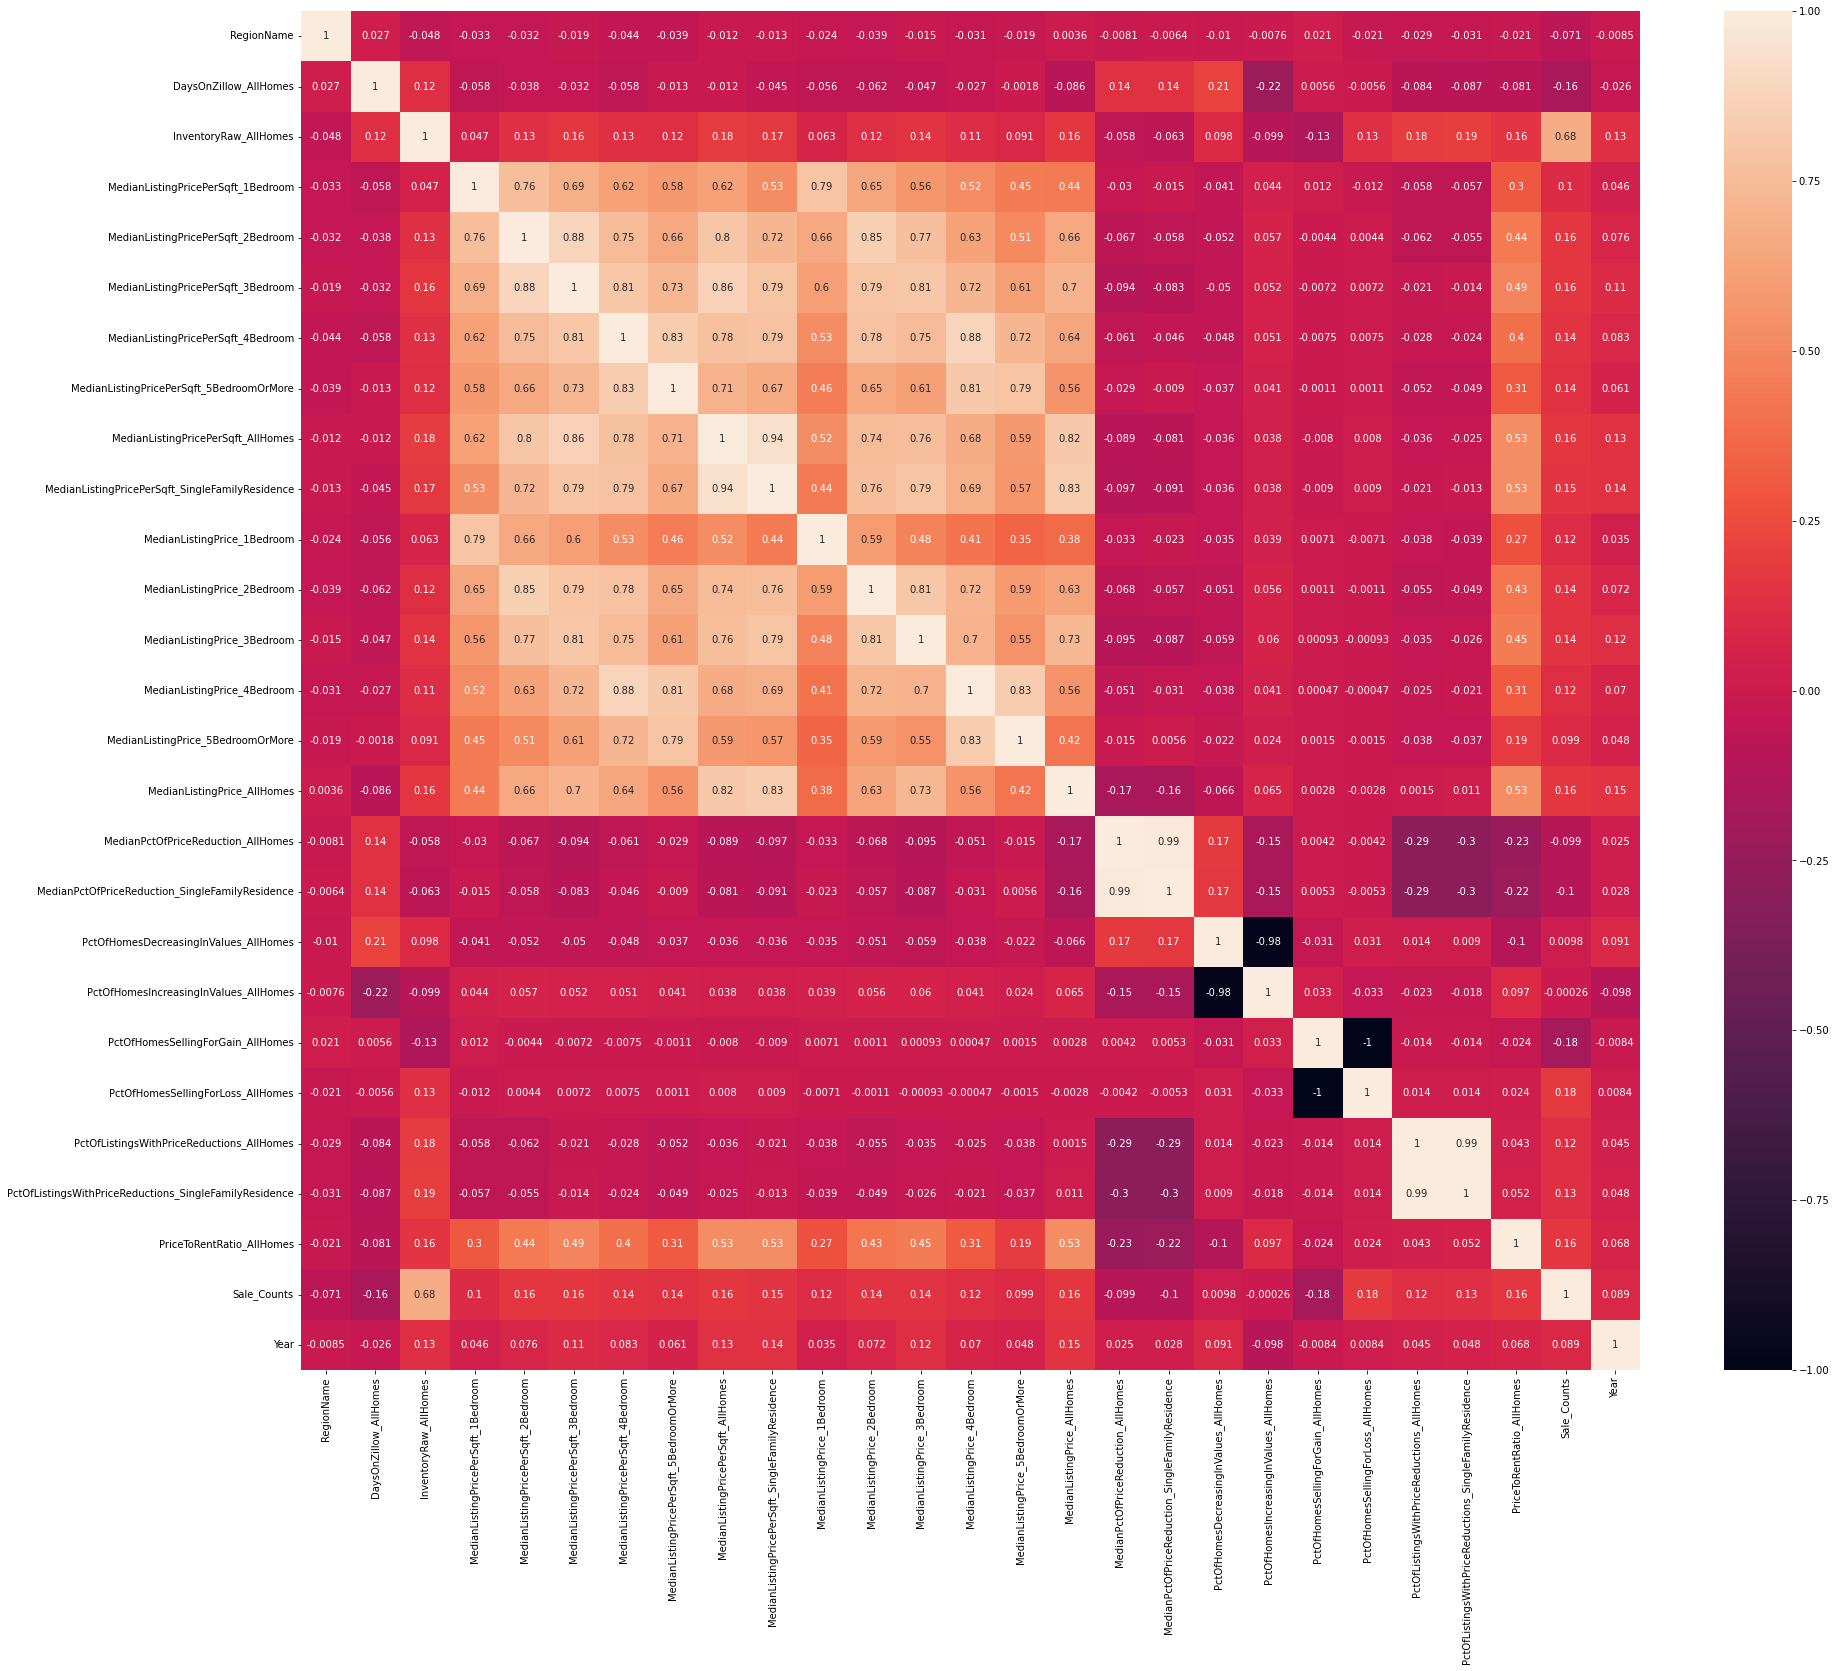

In [28]:
plt.figure(figsize=(30, 25))
sns.heatmap(ZillowData.corr(), annot=True)

This is a high level overview of the relationship between all our features